In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
DATA_DIR = ('d:/maschineLearning/zoomcamp/CapstoneProjectMusicGenre/')

In [94]:
df = pd.read_csv(DATA_DIR + 'data/external/music_genre.csv')

In [95]:
print(df.shape)
df.head()

(50005, 18)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


# 1. Exploratory data analysis (EDA)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [97]:
df['tempo'].head(50)

0                100.889
1     115.00200000000001
2                127.994
3                128.014
4                145.036
5                      ?
6                149.995
7                120.008
8     149.94799999999998
9                139.933
10                57.528
11               178.543
12               128.043
13               154.745
14               139.911
15               100.024
16               151.756
17               127.958
18               135.532
19               117.999
20    145.02700000000002
21                83.943
22               162.266
23               109.965
24               105.919
25               125.109
26    120.00200000000001
27                174.86
28                115.01
29    135.05700000000002
30    127.98899999999999
31               130.013
32                     ?
33                60.191
34               136.028
35                     ?
36                     ?
37               109.055
38               160.179
39                     ?


In [98]:
df.tempo[df['tempo'].isnull()]

10000    NaN
10001    NaN
10002    NaN
10003    NaN
10004    NaN
Name: tempo, dtype: object

In [99]:
df['tempo'] = pd.to_numeric(df.tempo, errors='coerce')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             45020 non-null  float64
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [101]:
df.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

In [102]:
column_str = ['artist_name', 'track_name', 'mode', 'music_genre']

In [103]:
for col in column_str:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,röyksopp,röyksopp's_night_out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,minor,0.0748,100.889,4-Apr,0.759,electronic
1,46652.0,thievery_corporation,the_shining_path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,minor,0.0300,115.002,4-Apr,0.531,electronic
2,30097.0,dillon_francis,hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,major,0.0345,127.994,4-Apr,0.333,electronic
3,62177.0,dubloadz,nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,major,0.2390,128.014,4-Apr,0.270,electronic
4,24907.0,what_so_not,divide_&_conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,major,0.0413,145.036,4-Apr,0.323,electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,bexey,go_getta,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,major,0.2980,98.028,4-Apr,0.330,hip-hop
50001,43557.0,roy_woods,drama_(feat._drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,major,0.0550,122.043,4-Apr,0.113,hip-hop
50002,39767.0,berner,lovin'_me_(feat._smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,major,0.1460,131.079,4-Apr,0.395,hip-hop
50003,57944.0,the-dream,shawty_is_da_shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,minor,0.0441,75.886,4-Apr,0.354,hip-hop


In [104]:
df.isnull().sum()

instance_id            5
artist_name            5
track_name             5
popularity             5
acousticness           5
danceability           5
duration_ms            5
energy                 5
instrumentalness       5
key                    5
liveness               5
loudness               5
mode                   5
speechiness            5
tempo               4985
obtained_date          5
valence                5
music_genre            5
dtype: int64

In [105]:
df = df.drop(["artist_name"], axis=1)
df = df.drop(["track_name"], axis=1)
df = df.drop(["obtained_date"], axis=1)
df = df.drop(["instance_id"], axis=1)
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,minor,0.0748,100.889,0.759,electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,minor,0.0300,115.002,0.531,electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,major,0.0345,127.994,0.333,electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,major,0.2390,128.014,0.270,electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,major,0.0413,145.036,0.323,electronic


In [106]:
df.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'music_genre'],
      dtype='object')

In [107]:
columns_categorical = ['key', 'mode']
columns_numerical = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence']

In [108]:
for col in columns_numerical:
    df[col] = df[col].fillna(df[col].mean())

In [109]:
for col in columns_categorical:
    df[col] = df[col].fillna(df[col].mode()[0])

In [110]:
df.isnull().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         5
dtype: int64

In [111]:
df = df.drop(df[df['music_genre'].isnull()].isnull().index, axis=0)

In [112]:
df.isnull().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64

In [113]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,119.952961,0.456264
std,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,29.075697,0.247119
min,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,96.775750,0.257000
50%,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,119.952961,0.448000
75%,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,139.468250,0.648000
max,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


In [114]:
df.nunique()

popularity             99
acousticness         4193
danceability         1088
duration_ms         26028
energy               2085
instrumentalness     5131
key                    12
liveness             1646
loudness            17247
mode                    2
speechiness          1337
tempo               29394
valence              1615
music_genre            10
dtype: int64

In [115]:
columns_cat = []
columns_cat.extend(columns_categorical)
columns_cat.append('music_genre')

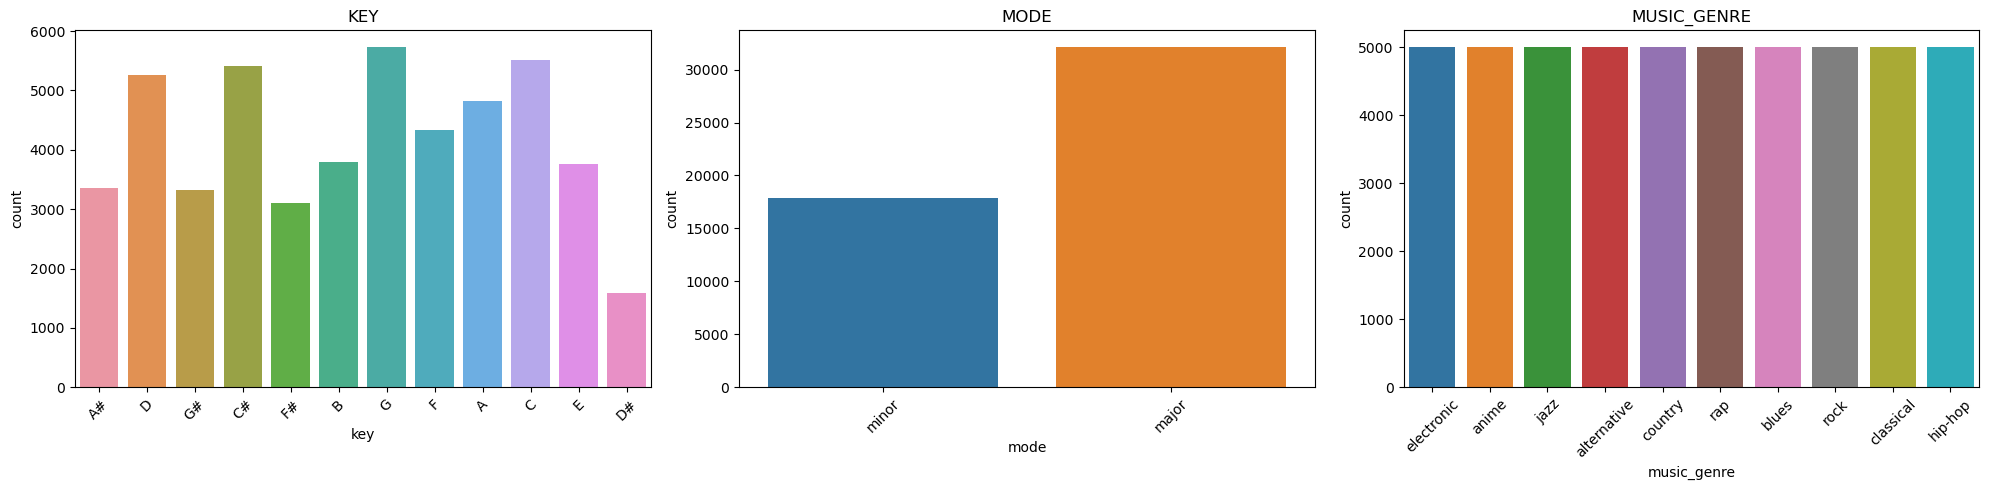

In [116]:
fix, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)
for i,col in enumerate(columns_cat):
    sns.countplot(data=df, x=col, ax=ax[i])
    ax[i].tick_params(axis='x', rotation=45) 
    ax[i].set_title(col.upper())

plt.tight_layout()
plt.show()

In [117]:
df.music_genre.value_counts()

electronic     5000
anime          5000
jazz           5000
alternative    5000
country        5000
rap            5000
blues          5000
rock           5000
classical      5000
hip-hop        5000
Name: music_genre, dtype: int64

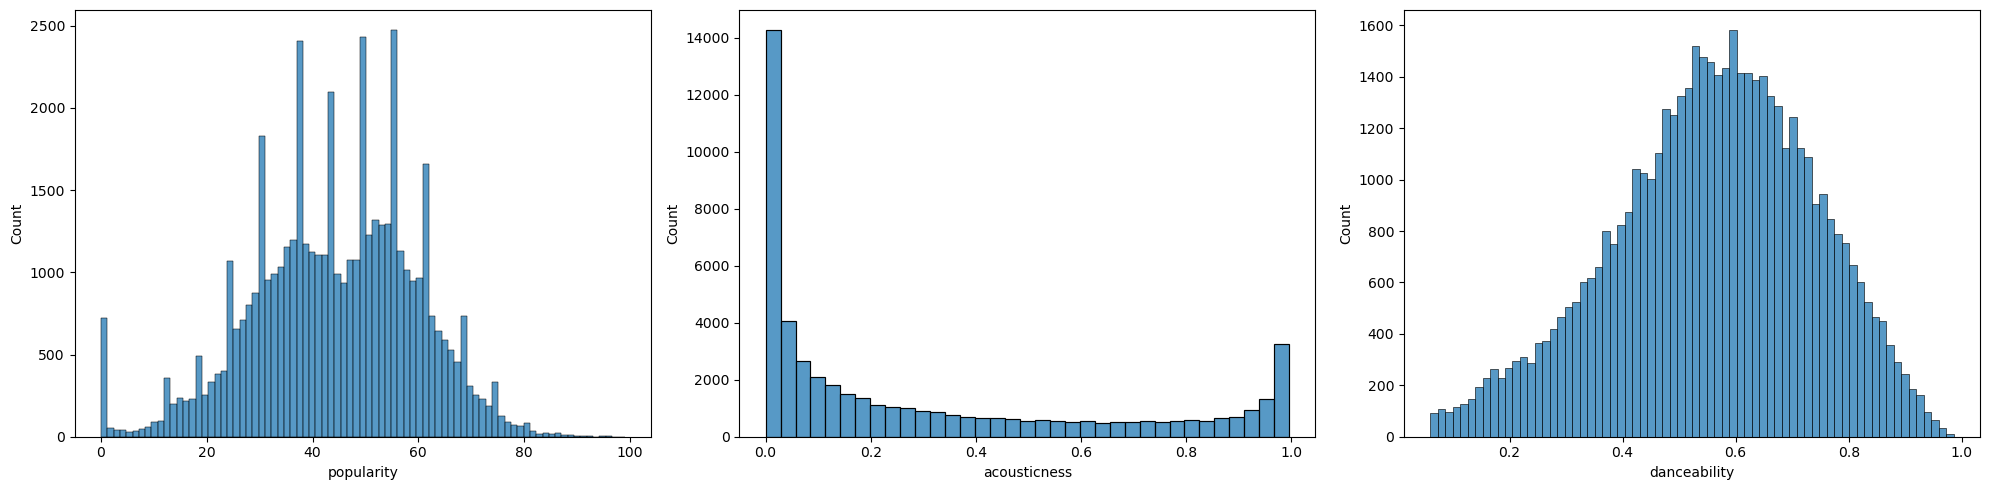

In [118]:
fix, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

for i,col in enumerate(columns_numerical[:3]):
    sns.histplot(df[col], ax=ax[i])

plt.tight_layout()
plt.show()

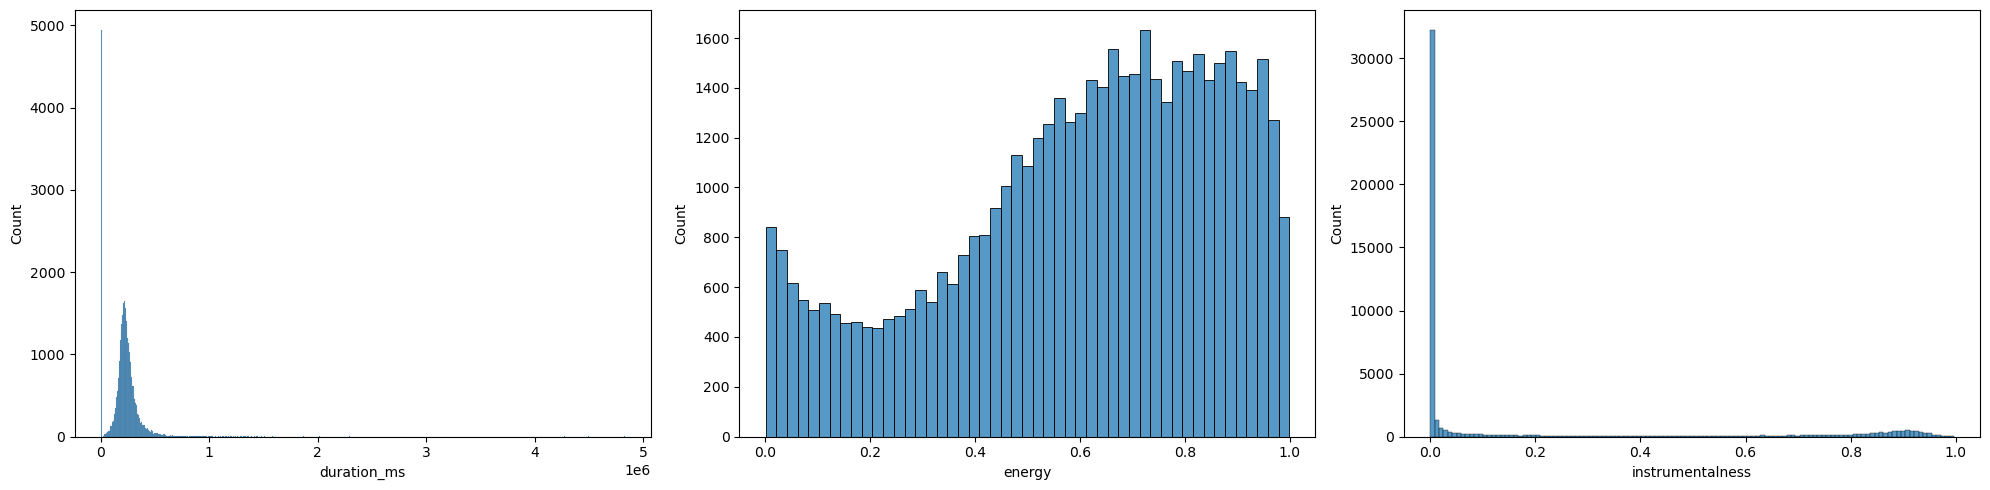

In [119]:
fix, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

for i,col in enumerate(columns_numerical[3:6]):
    sns.histplot(df[col], ax=ax[i])

plt.tight_layout()
plt.show()

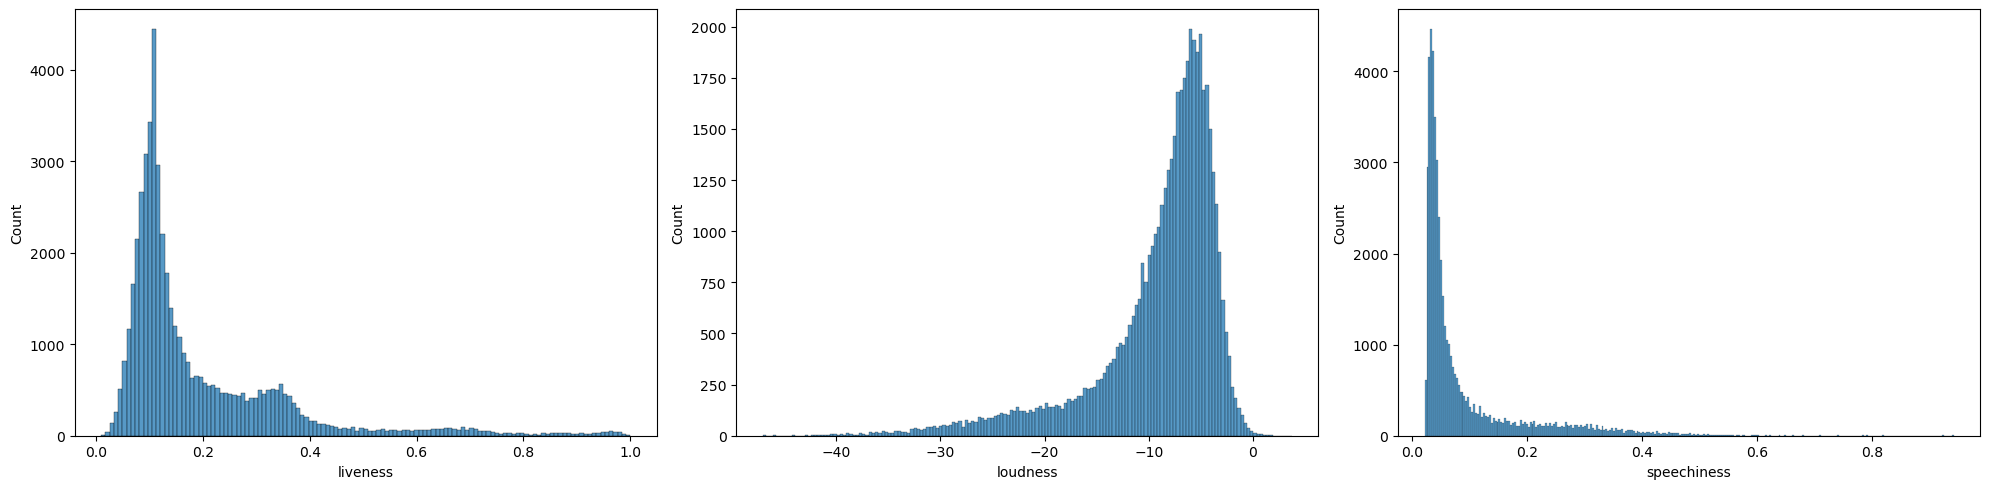

In [120]:
fix, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

for i,col in enumerate(columns_numerical[6:9]):
    sns.histplot(df[col], ax=ax[i])

plt.tight_layout()
plt.show()

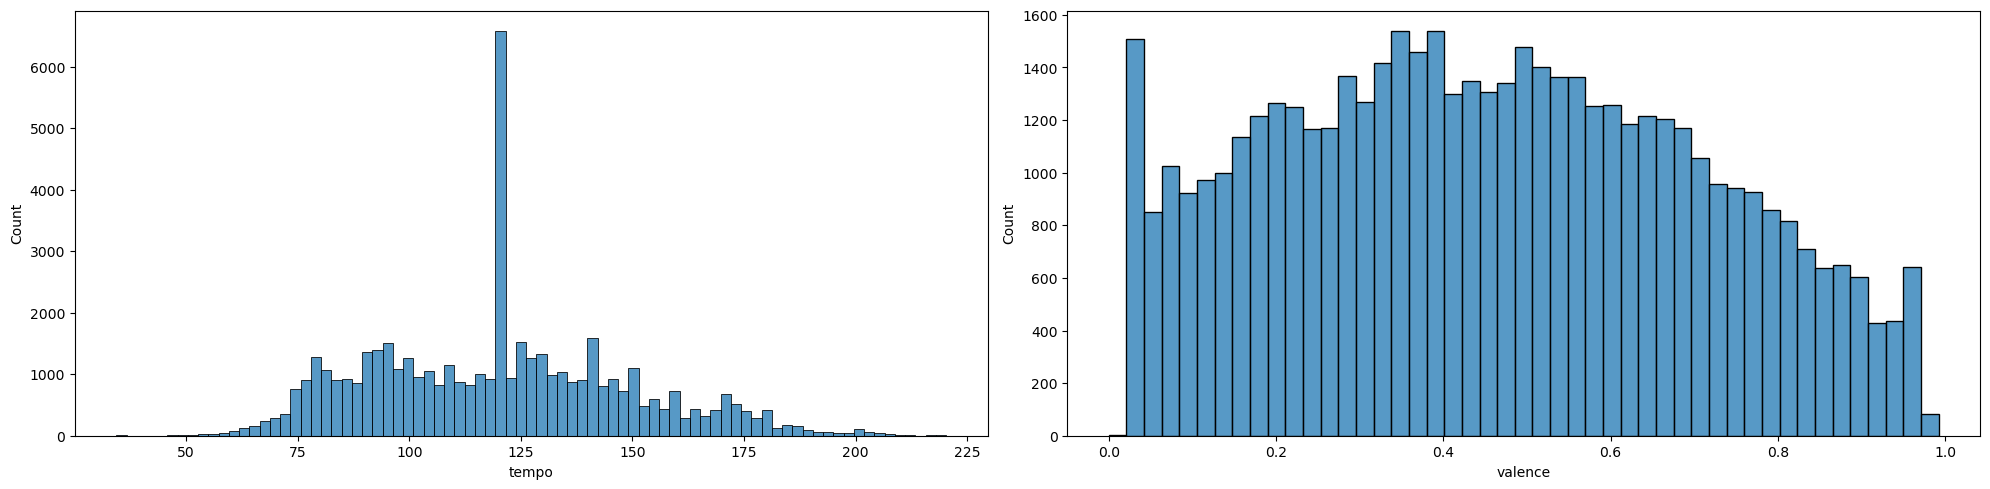

In [121]:
fix, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=2)

for i,col in enumerate(columns_numerical[9:]):
    sns.histplot(df[col], ax=ax[i])

plt.tight_layout()
plt.show()

# Data preparation

In [122]:
columns = df.columns
columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'music_genre'],
      dtype='object')

In [123]:
data = df.copy()
data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,minor,0.0748,100.889,0.759,electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,minor,0.0300,115.002,0.531,electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,major,0.0345,127.994,0.333,electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,major,0.2390,128.014,0.270,electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,major,0.0413,145.036,0.323,electronic


In [124]:
from sklearn.model_selection import train_test_split

In [125]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [126]:
len(df_train), len(df_val), len(df_test)

(30000, 10000, 10000)

In [127]:
df_val

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
30830,27.0,0.88900,0.400,280293.0,0.284,0.023800,A#,0.9090,-15.542,minor,0.0702,176.781000,0.6290,blues
42569,33.0,0.96300,0.534,278760.0,0.143,0.897000,D#,0.0623,-20.085,major,0.0434,135.986000,0.4110,classical
16503,47.0,0.01160,0.527,258360.0,0.657,0.000952,C#,0.0985,-9.087,minor,0.0631,119.416000,0.3600,alternative
6597,27.0,0.18400,0.172,247461.0,0.442,0.927000,E,0.1080,-15.799,minor,0.0480,185.991000,0.0767,anime
39142,57.0,0.06860,0.581,204013.0,0.739,0.000001,A,0.0601,-4.762,major,0.0504,155.051000,0.5650,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29770,51.0,0.00430,0.585,-1.0,0.928,0.000000,F,0.2750,-4.939,major,0.0607,104.007000,0.5470,rap
29336,54.0,0.00354,0.749,242880.0,0.909,0.000000,G#,0.3370,-2.808,major,0.0740,149.988000,0.3930,rap
4919,49.0,0.00305,0.454,223148.0,0.635,0.000000,G,0.3010,-6.218,minor,0.0292,142.040000,0.1570,electronic
37535,65.0,0.56900,0.355,266920.0,0.478,0.000003,C,0.1940,-8.323,major,0.0335,102.971000,0.2690,rock


In [128]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,25.0,0.007730,0.530,206800.0,0.896,0.003030,G,0.0833,-5.489,major,0.1370,123.602000,0.243,blues
1,14.0,0.000015,0.378,284413.0,0.846,0.746000,G#,0.0681,-5.435,minor,0.0609,195.885000,0.527,anime
2,36.0,0.024900,0.865,274013.0,0.650,0.000391,A,0.1020,-8.025,minor,0.1010,120.030000,0.557,electronic
3,52.0,0.888000,0.642,186080.0,0.139,0.000014,C,0.3380,-14.776,major,0.0306,89.880000,0.332,jazz
4,64.0,0.005700,0.615,237653.0,0.487,0.002990,B,0.0995,-10.089,minor,0.0269,104.986000,0.323,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61.0,0.081800,0.800,137770.0,0.696,0.000000,F#,0.1210,-5.354,minor,0.3930,159.953000,0.628,rap
9996,71.0,0.317000,0.652,312427.0,0.549,0.000000,F#,0.1040,-7.555,minor,0.0390,120.073000,0.186,rap
9997,49.0,0.000950,0.473,-1.0,0.649,0.000104,C,0.0971,-5.468,major,0.1070,119.952961,0.620,alternative
9998,58.0,0.002160,0.427,200480.0,0.843,0.000000,E,0.1790,-4.540,major,0.0364,147.387000,0.304,alternative


In [129]:
df_train.to_csv(DATA_DIR + '/data/processed/train.csv')
df_test.to_csv(DATA_DIR + '/data/processed/test.csv')
df_val.to_csv(DATA_DIR + '/data/processed/val.csv')